# Set Environment

In [1]:
# load required packages
import numpy as np
from numpy import random
from scipy.interpolate import Rbf

import copy
from collections import Counter

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline      import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.base          import BaseEstimator, TransformerMixin

from sklearn import datasets

import matplotlib.pyplot as plt

# helper function
head = lambda x, k = 6: x[:k]
tail = lambda x, k = 6: x[-k:]

# IRIS data

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

# PCA

In [12]:
pca = PCA(n_components=2)
coord = pca.fit_transform(X)

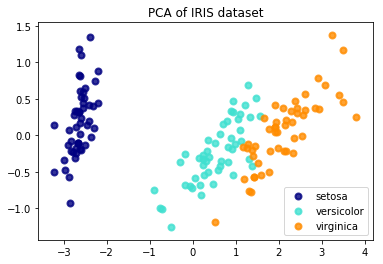

In [13]:
plt.figure()

colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(coord[y == i, 0], 
                coord[y == i, 1], 
                color = color, 
                alpha =.8, 
                lw    = lw,
                label = target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

# Interpolation

In [15]:
x = coord[:, 0]
y = coord[:, 1]
n_grid = 128

# generate a grid
x_c = np.linspace(min(x), max(x), n_grid)
y_c = np.linspace(min(y), max(y), n_grid)
x_c, y_c = np.meshgrid(x_c, y_c)

In [17]:
num_features = X.shape[1]
print(num_features)

4


In [21]:
# each feature is a layer/channel for the plot
# to get each layer, perform interpolation to convert tSNE plot in a image
lst_img = []
for idx_feature in range(num_features):
         
    # interpolation
    z = X[:, idx_feature]
    print(z.shape)
    rbfi = Rbf(x, y, z, function='multiquadric', smooth=1)
            
    # store into a list "img"
    z_c = rbfi(x_c, y_c)
    lst_img.append(z_c)
            
# normalize & arrange the interpolated feature values    
lst_img = np.array(lst_img)

(150,)
(150,)
(150,)
(150,)


In [22]:
lst_img.shape

(4, 128, 128)


# plot

In [49]:
idx = 2
sample = X[:, idx]
img = lst_img[idx]
print(sample.shape)
print(img.shape)

(150,)
(128, 128)


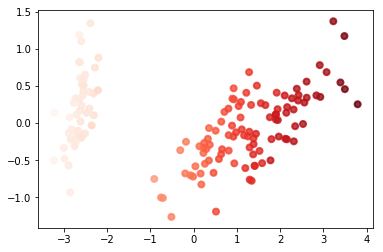

In [50]:
plt.scatter(
    coord[:, 0], 
    coord[:, 1],
    c = sample,
    alpha =.8, 
    lw    = lw,
    cmap=plt.get_cmap('Reds'))
plt.show()

In [51]:
print(x_c.shape)
print(y_c.shape)
print(img.shape)

(128, 128)
(128, 128)
(128, 128)


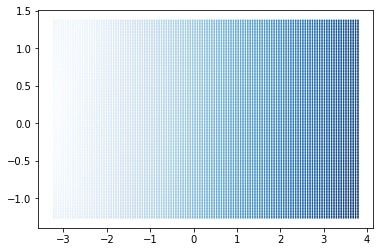

In [52]:
plt.scatter(
    x_c, y_c, 
    c = img,
    s = 0.5,
    cmap=plt.get_cmap('Blues'))
plt.show()

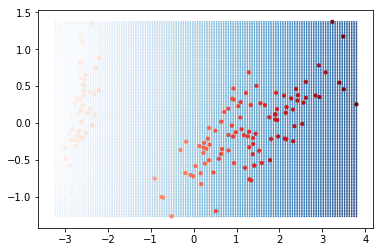

In [53]:
plt.scatter(
    x_c, y_c, 
    c = img,
    s = 0.5,
    alpha =.8,
    cmap=plt.get_cmap('Blues'))

plt.scatter(
    coord[:, 0], 
    coord[:, 1],
    c = sample,
    s = 10,
    cmap=plt.get_cmap('Reds'))

plt.show()